# Application of scPI-ZINB on Cortex

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import time
import warnings
warnings.filterwarnings('ignore')
from scPI import scPI_ZINB
from utils import *
np.random.seed(1234)
torch.manual_seed(1234)
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

## Clustering

### Load data and fit scPI-ZINB

In [2]:
data_path = "/home/jzhaoaz/jiazhao/scPI_v2/package/datasets/cortex/"
expression_train = np.loadtxt(data_path + "data_train", dtype='float32')
expression_test = np.loadtxt(data_path + "data_test", dtype='float32')
label_train = np.loadtxt(data_path + "label_train")
print(expression_train.shape, expression_test.shape, label_train.shape)
print("CORTEX dataset: 3005 cells (2253 training, 752 testing), 558 selected highly variable genes.")

(2253, 558) (752, 558) (2253,)
CORTEX dataset: 3005 cells (2253 training, 752 testing), 558 selected highly variable genes.


In [3]:
t_start = time.time()
result, result_test = scPI_ZINB.fitModel(Y=expression_train, K=10, Y_test=expression_test)
t_end = time.time()
print('Computational time = %1.1f minutes.' % ((t_end-t_start)/60.0))

Computational time = 1.8 minutes.


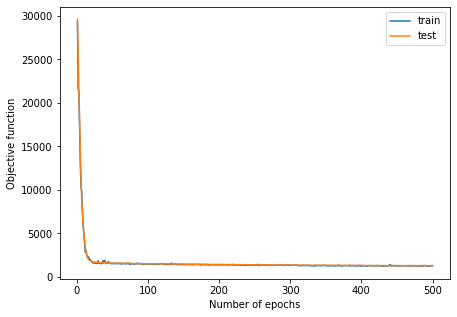

In [4]:
visualize_loss(result['epochs'], result['losses'], result_test['losses'])

### Evaluate clustering scores (ASW, NMI, ARI) and visualize latent distance

In [5]:
latent = result['latent']

In [6]:
scores = cluster_scores(latent, 7, label_train)
print('Clustering scores [ASW, NMI, ARI] = [%f, %f, %f].' % (scores[0], scores[1], scores[2]))

Clustering scores [ASW, NMI, ARI] = [0.252511, 0.772781, 0.764851].


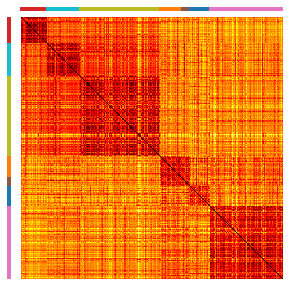

In [7]:
visualize_distance_cortex(latent, label_train)

## Imputation

### Load randomly dropout data and fit scPI_ZINB

In [8]:
data_path = "/home/jzhaoaz/jiazhao/scPI_v2/package/datasets/cortex/"
X_zero = np.loadtxt(data_path + "X_zero.txt", dtype='float32')
N, D = X_zero.shape
i = np.load(data_path + "i.npy")
j = np.load(data_path + "j.npy")
ix = np.load(data_path + "ix.npy")
X_true = np.loadtxt(data_path + "data_train", dtype='float32')

In [9]:
t_start = time.time()
result, result_test = scPI_ZINB.fitModel(Y=X_zero, K=10, Y_test=None)
t_end = time.time()
print('Computational time = %1.1f minutes.' % ((t_end-t_start)/60.0))

Computational time = 2.1 minutes.


### Evaluate imputation error

In [10]:
X_impu = result["rho"]
impu_err = imputation_error(X_impu, X_true, X_zero, i, j, ix)
print('Imputation error on randomly dropout data = %f.' % impu_err)

Imputation error on randomly dropout data = 2.318920.
